<a href="https://colab.research.google.com/github/lucasjsgoncalves/classication_algo_olist/blob/main/algoritmos__de_classificacao_revenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier


In [ ]:
tabela = pd.read_csv('/content/drive/MyDrive/DATA/propensao_revenda_abt.csv')

In [ ]:
tabela.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [ ]:
pd.get_dummies(tabela['uf'],dtype=int)

,AM,BA,CE,DF,ES,GO,MA,MG,MS,MT,...,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5366,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
tabela = pd.concat([tabela,pd.get_dummies(tabela['uf'],dtype=int)],axis=1)

In [ ]:
tabela_1= tabela[tabela['nao_revendeu_next_6m'] == 1]
tabela_0 = tabela[tabela['nao_revendeu_next_6m'] == 0]
tabela_balanceada = pd.concat([tabela_0.sample(len(tabela_1)),tabela_1], axis=0)
tabela = tabela_balanceada

In [ ]:
tabela.columns

Index(['data_ref_safra', 'seller_id', 'uf', 'tot_orders_12m', 'tot_items_12m',
       'tot_items_dist_12m', 'receita_12m', 'recencia', 'nao_revendeu_next_6m',
       'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB',
       'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP'],
      dtype='object')

In [ ]:
escalador = MinMaxScaler()
x = escalador.fit_transform(tabela[['tot_orders_12m', 'tot_items_12m',
       'tot_items_dist_12m', 'receita_12m', 'recencia',
       'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB',
       'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP']].values)

In [ ]:
x

array([[0.00235294, 0.00226074, 0.00337838, ..., 0.        , 0.        ,
        0.        ],
       [0.01490196, 0.01733233, 0.03378378, ..., 0.        , 0.        ,
        1.        ],
       [0.00235294, 0.00301432, 0.01013514, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00470588, 0.00452148, 0.00675676, ..., 0.        , 0.        ,
        1.        ],
       [0.00235294, 0.00226074, 0.00675676, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y = tabela['nao_revendeu_next_6m'].values

In [ ]:
tabela['nao_revendeu_next_6m'].value_counts()

,count
nao_revendeu_next_6m,
0,2053
1,2053


In [ ]:
tabela[tabela['nao_revendeu_next_6m'] == 0].sample(2053)

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m,AM,...,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
1527,2018-01-01,e96498ed8daaa3e9c23f7a62da76591c,SP,12,12,12,4359.88,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5148,2018-03-01,e59e489e2ea74bd409b798b5daf49de3,PR,2,4,2,396.00,44,0,0,...,0,0,1,0,0,0,0,0,0,0
5226,2018-03-01,eec3469d83e142f9a104886655338c37,SP,1,1,1,10.90,337,0,0,...,0,0,0,0,0,0,0,0,0,1
250,2018-01-01,236585a4ddb5fea9fa40233e2249ed91,RS,7,7,2,389.66,18,0,0,...,0,0,0,0,0,0,1,0,0,0
634,2018-01-01,5dceca129747e92ff8ef7a997dc4f8ca,SP,238,257,35,56506.71,2,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,2018-03-01,218f991754f360af9c2daa5e0b8e990c,SP,3,3,1,659.70,46,0,0,...,0,0,0,0,0,0,0,0,0,1
3868,2018-03-01,323ce52b5b81df2cd804b017b7f09aa7,SP,13,13,7,924.80,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2625,2018-02-01,822166ed1e47908f7cfb49946d03c726,RJ,52,86,26,2905.95,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1714,2018-02-01,02d35243ea2e497335cd0f076b45675d,RN,12,14,2,5246.00,44,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,train_size=0.7)

#Árvore de Decisão

In [ ]:
modelo = DecisionTreeClassifier(max_depth=4,min_samples_leaf=10)
modelo.fit(x_treino,y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [ ]:
modelo.predict(x_teste)

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
y_treino

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
comparacao =pd.DataFrame( data = {'real':y_teste,
    'prev':modelo.predict(x_teste)})

In [ ]:
comparacao.head()

,real,prev,acerto
0,0,1,False
1,0,0,True
2,1,1,True
3,1,1,True
4,1,1,True


In [ ]:
comparacao['acerto'] = comparacao['real'] == comparacao['prev']

In [ ]:
comparacao.pivot_table(index='real',columns='prev',values='acerto',aggfunc='count')

prev,0,1
real,,
0,505,116
1,95,516


In [ ]:
modelo.score(x_teste,y_teste)



0.8287337662337663

In [ ]:
modelo.score(x_treino,y_treino)

0.826026443980515

[Text(0.5, 0.9, 'recencia <= 0.125\ngini = 0.5\nsamples = 2874\nvalue = [1432.0, 1442.0]'),
 Text(0.25, 0.7, 'recencia <= 0.059\ngini = 0.318\nsamples = 1487\nvalue = [1192, 295]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'tot_orders_12m <= 0.004\ngini = 0.202\nsamples = 1072\nvalue = [950, 122]'),
 Text(0.0625, 0.3, 'receita_12m <= 0.009\ngini = 0.39\nsamples = 279\nvalue = [205, 74]'),
 Text(0.03125, 0.1, 'gini = 0.406\nsamples = 261\nvalue = [187, 74]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.1875, 0.3, 'tot_orders_12m <= 0.008\ngini = 0.114\nsamples = 793\nvalue = [745, 48]'),
 Text(0.15625, 0.1, 'gini = 0.222\nsamples = 181\nvalue = [158, 23]'),
 Text(0.21875, 0.1, 'gini = 0.078\nsamples = 612\nvalue = [587, 25]'),
 Text(0.375, 0.5, 'receita_12m <= 0.001\ngini = 0.486\nsamples = 415\nvalue = [242, 173]'),
 Text(0.3125, 0.3, 'tot_items_12m <= 0.003\ngini = 0.49\nsamples = 137\nvalue = [59.0, 78.0]'),
 Text(0.28125, 0.1, 'gini = 0.495\nsampl

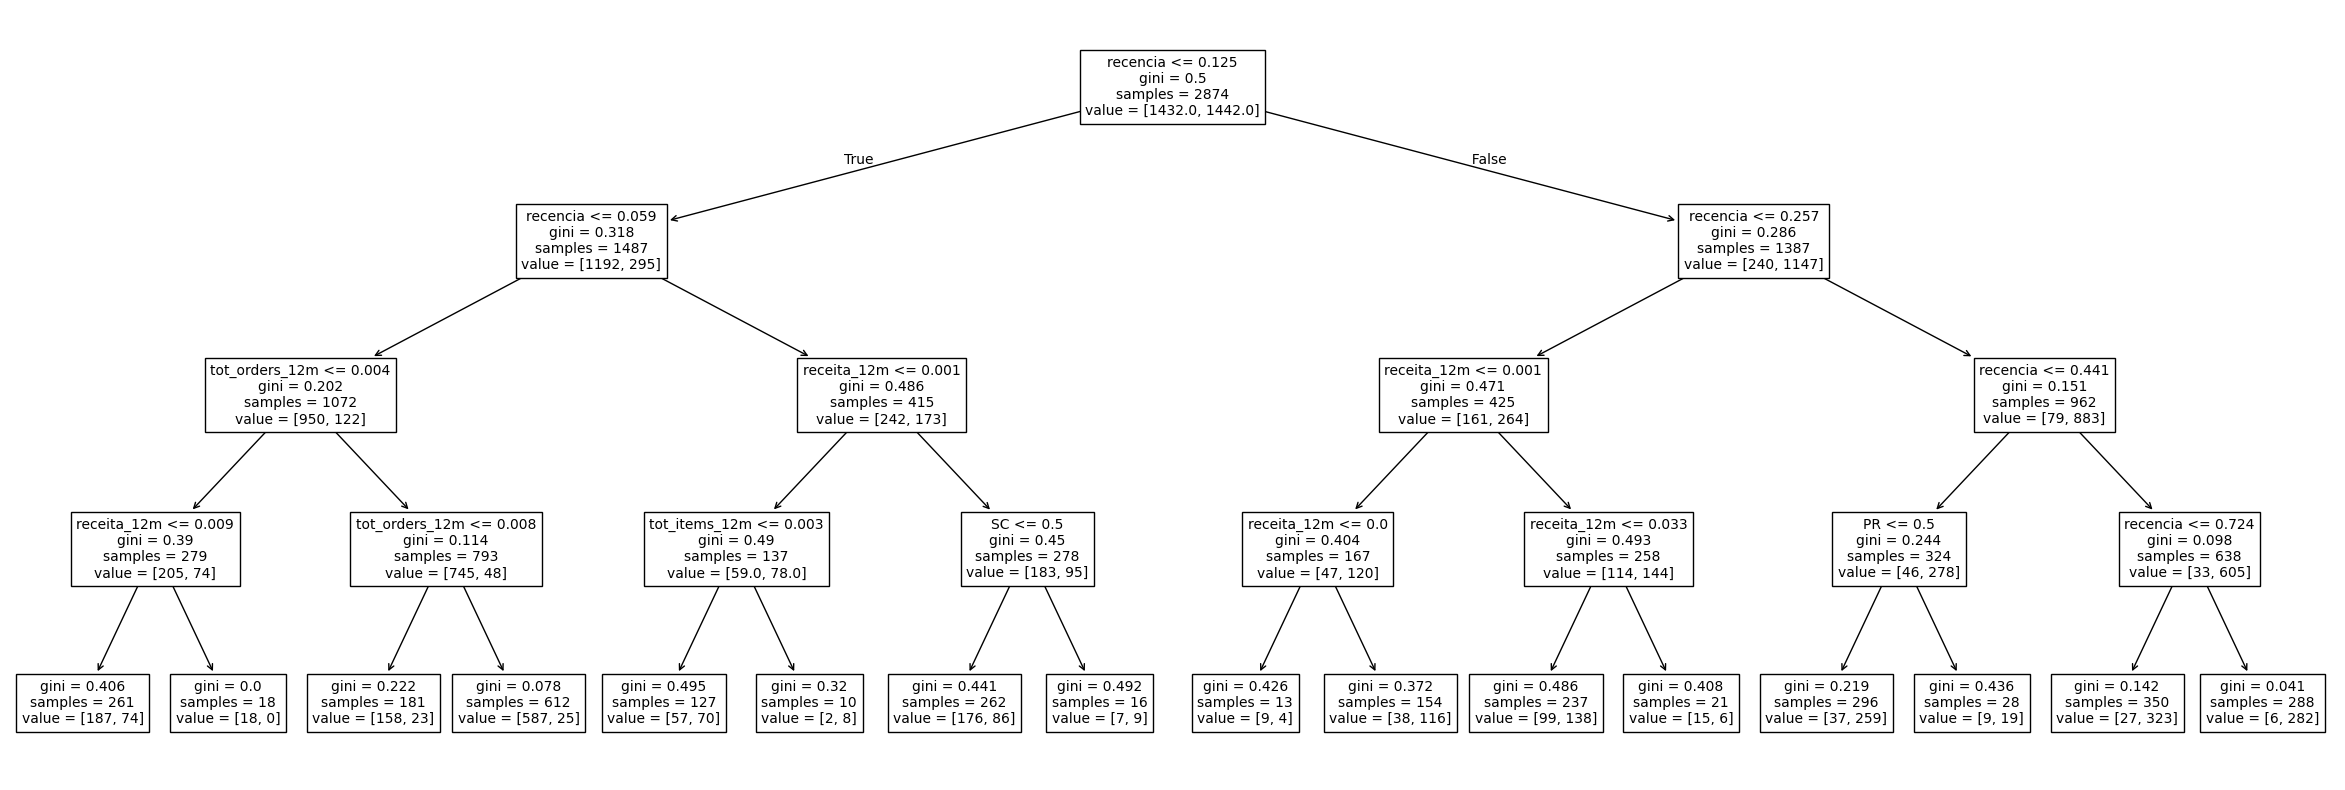

In [ ]:
plt.figure(figsize=(30,10))
plot_tree(modelo,fontsize=10, feature_names=['tot_orders_12m', 'tot_items_12m',
       'tot_items_dist_12m', 'receita_12m', 'recencia',
       'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB',
       'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP'])

In [ ]:
modelo.get_depth()

4

In [ ]:
list_zeros = np.zeros((1,27))

In [ ]:
list_zeros[0][4] = 0.144

In [ ]:
escalador.inverse_transform(list_zeros)

array([[ 1.   ,  1.   ,  1.   ,  6.5  , 52.416,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ]])

In [ ]:
print(classification_report(y_teste,modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       621
           1       0.82      0.84      0.83       611

    accuracy                           0.83      1232
   macro avg       0.83      0.83      0.83      1232
weighted avg       0.83      0.83      0.83      1232



In [ ]:
confusion_matrix(y_teste,modelo.predict(x_teste))

array([[505, 116],
       [ 95, 516]])

In [ ]:
(roc_curve(y_teste,modelo.predict_proba(x_teste).max(axis=1)))

(array([0.        , 0.00805153, 0.01932367, 0.43478261, 0.44283414,
        0.47987118, 0.59259259, 0.5942029 , 0.6215781 , 0.76972625,
        0.77133655, 0.77133655, 0.77616747, 0.90338164, 0.96940419,
        0.9742351 , 1.        ]),
 array([0.        , 0.00163666, 0.22749591, 0.2487725 , 0.47790507,
        0.63338789, 0.64811784, 0.65139116, 0.71194763, 0.76432079,
        0.77250409, 0.7806874 , 0.80851064, 0.85761047, 0.95908347,
        0.96399345, 1.        ]),
 array([       inf, 1.        , 0.97916667, 0.95915033, 0.92285714,
        0.875     , 0.87292818, 0.8       , 0.75324675, 0.7164751 ,
        0.71428571, 0.69230769, 0.67857143, 0.67175573, 0.58227848,
        0.5625    , 0.5511811 ]))

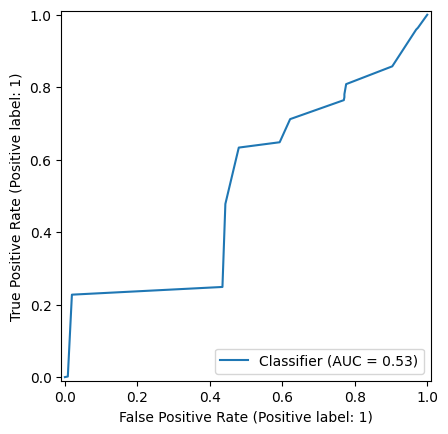

In [ ]:
RocCurveDisplay.from_predictions(y_teste,modelo.predict_proba(x_teste).max(axis=1))

#Regressão Logística


In [ ]:
regressao = LogisticRegression()
regressao.fit(x_treino,y_treino)

LogisticRegression()

In [ ]:
print(classification_report(y_teste,regressao.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       621
           1       0.88      0.77      0.82       611

    accuracy                           0.83      1232
   macro avg       0.84      0.83      0.83      1232
weighted avg       0.84      0.83      0.83      1232



#Ensemble

In [ ]:
modelo_ensemble = DecisionTreeClassifier(max_depth=4,min_samples_leaf=10)
regressao_ensemble = LogisticRegression()


ensemble = VotingClassifier([('arvore',modelo_ensemble),('regressao',regressao_ensemble)],voting='soft')

In [ ]:
ensemble.fit(x_treino,y_treino)

VotingClassifier(estimators=[('arvore',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_leaf=10)),
                             ('regressao', LogisticRegression())],
                 voting='soft')

In [ ]:
print(classification_report(y_treino,ensemble.predict(x_treino)))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1432
           1       0.85      0.78      0.81      1442

    accuracy                           0.82      2874
   macro avg       0.82      0.82      0.82      2874
weighted avg       0.82      0.82      0.82      2874



In [ ]:
print(classification_report(y_teste,ensemble.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       621
           1       0.85      0.79      0.82       611

    accuracy                           0.82      1232
   macro avg       0.83      0.82      0.82      1232
weighted avg       0.83      0.82      0.82      1232



#Random Forest

In [ ]:
floresta = RandomForestClassifier(n_estimators=103,max_depth=5,min_samples_leaf=11)

In [ ]:
floresta.fit(x_treino,y_treino)

RandomForestClassifier(max_depth=5, min_samples_leaf=11, n_estimators=103)

In [ ]:
print(classification_report(y_treino,floresta.predict(x_treino)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1432
           1       0.83      0.83      0.83      1442

    accuracy                           0.83      2874
   macro avg       0.83      0.83      0.83      2874
weighted avg       0.83      0.83      0.83      2874



#Ensemble - Random Regressão Logística

In [ ]:
ensemble_rl= BaggingClassifier(estimator=LogisticRegression(),n_estimators=18)

In [ ]:
ensemble_rl.fit(x_treino,y_treino)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=18)

In [ ]:
print(classification_report(y_treino,ensemble_rl.predict(x_treino)))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1432
           1       0.86      0.72      0.79      1442

    accuracy                           0.80      2874
   macro avg       0.81      0.80      0.80      2874
weighted avg       0.81      0.80      0.80      2874



#Gradient Boosting

In [ ]:
gradientboost= GradientBoostingClassifier()

In [ ]:
gradientboost.fit(x_treino,y_treino)

GradientBoostingClassifier()

In [ ]:
print(classification_report(y_treino,gradientboost.predict(x_treino)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1432
           1       0.84      0.86      0.85      1442

    accuracy                           0.85      2874
   macro avg       0.85      0.85      0.85      2874
weighted avg       0.85      0.85      0.85      2874



In [ ]:
print(classification_report(y_teste,gradientboost.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       621
           1       0.84      0.84      0.84       611

    accuracy                           0.84      1232
   macro avg       0.84      0.84      0.84      1232
weighted avg       0.84      0.84      0.84      1232

